In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)

OS                  Linux-6.1.123+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.12
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 12.67 GB
Disk                41.3/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 2.0.2>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.2.1>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.15.3>=1.4.1
torch               ✅ 2.6.0+cu124>=1.8.0
torch               ✅ 2.6.0+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.21.0+cu124>=0.9.0
tqdm                ✅ 4.67.

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aUgLRbSsOoYQZwK7r48V")
project = rf.workspace("nouran").project("dataset-v19jd")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset-1 in yolov8:: 100%|██████████| 496/496 [00:00<00:00, 9217.11it/s]


In [2]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/dataset-1/data.yaml epochs=10 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 95.7MB/s]
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

In [3]:
from IPython.display import Image

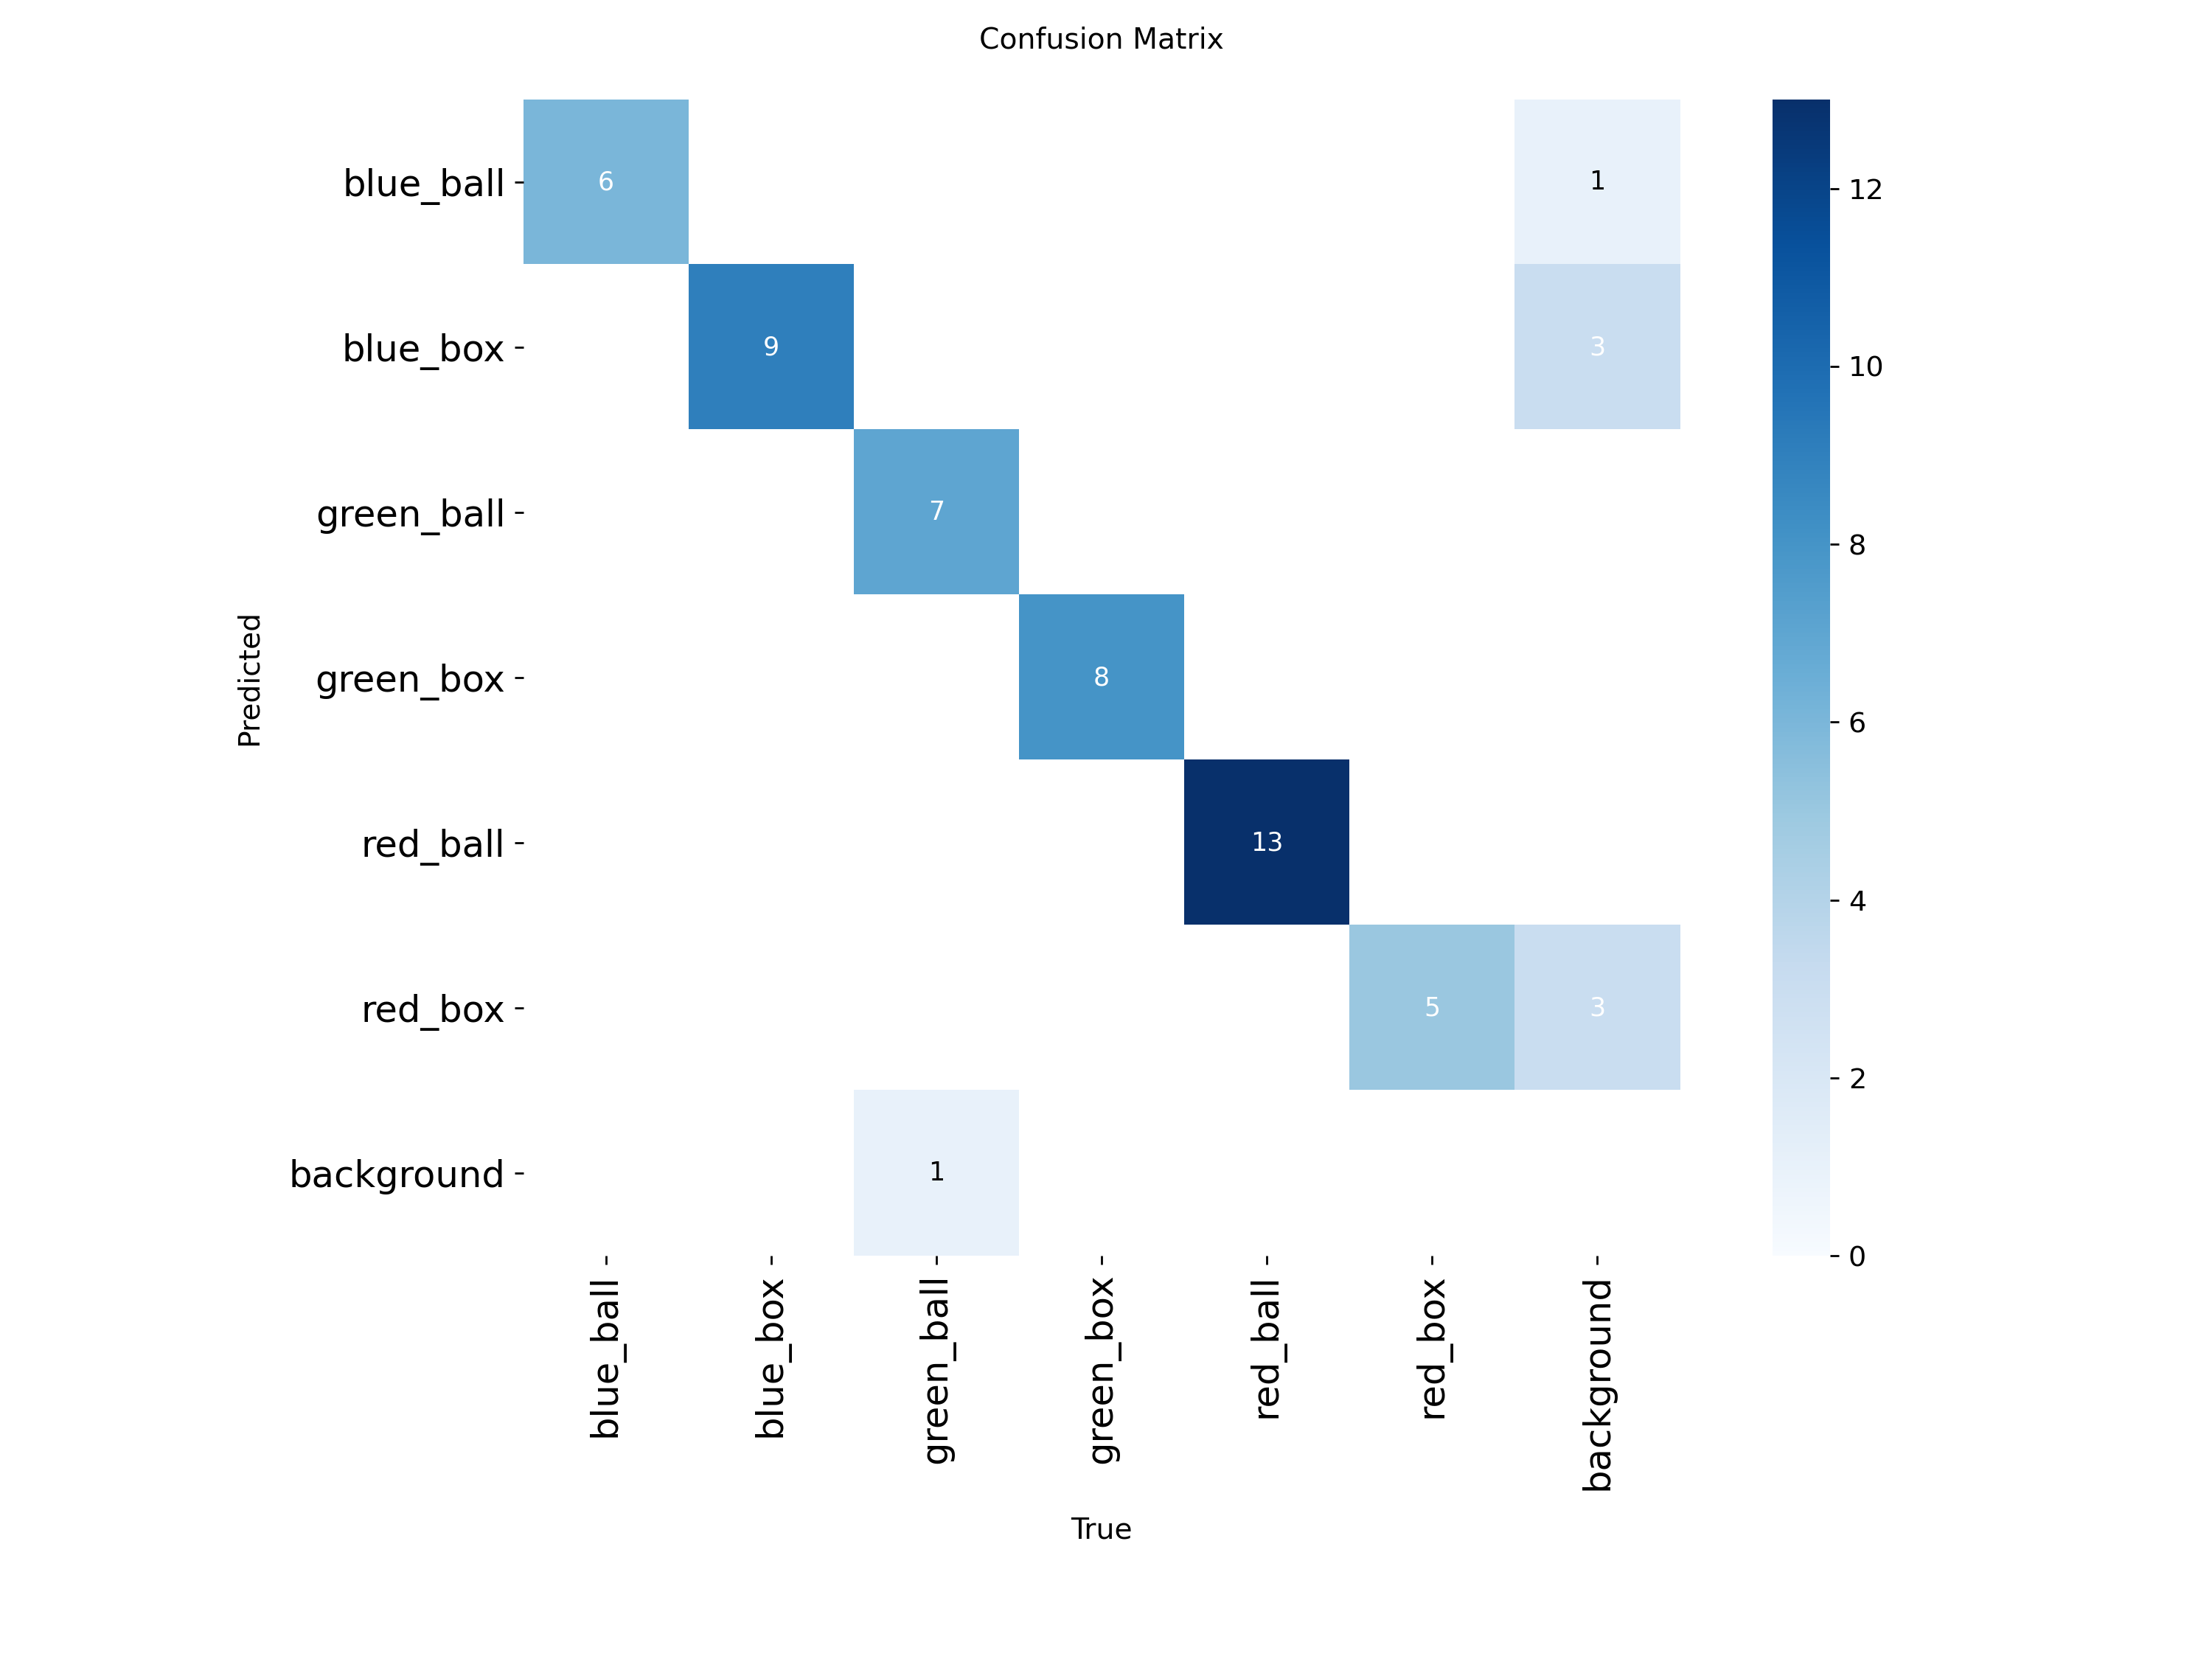

In [4]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

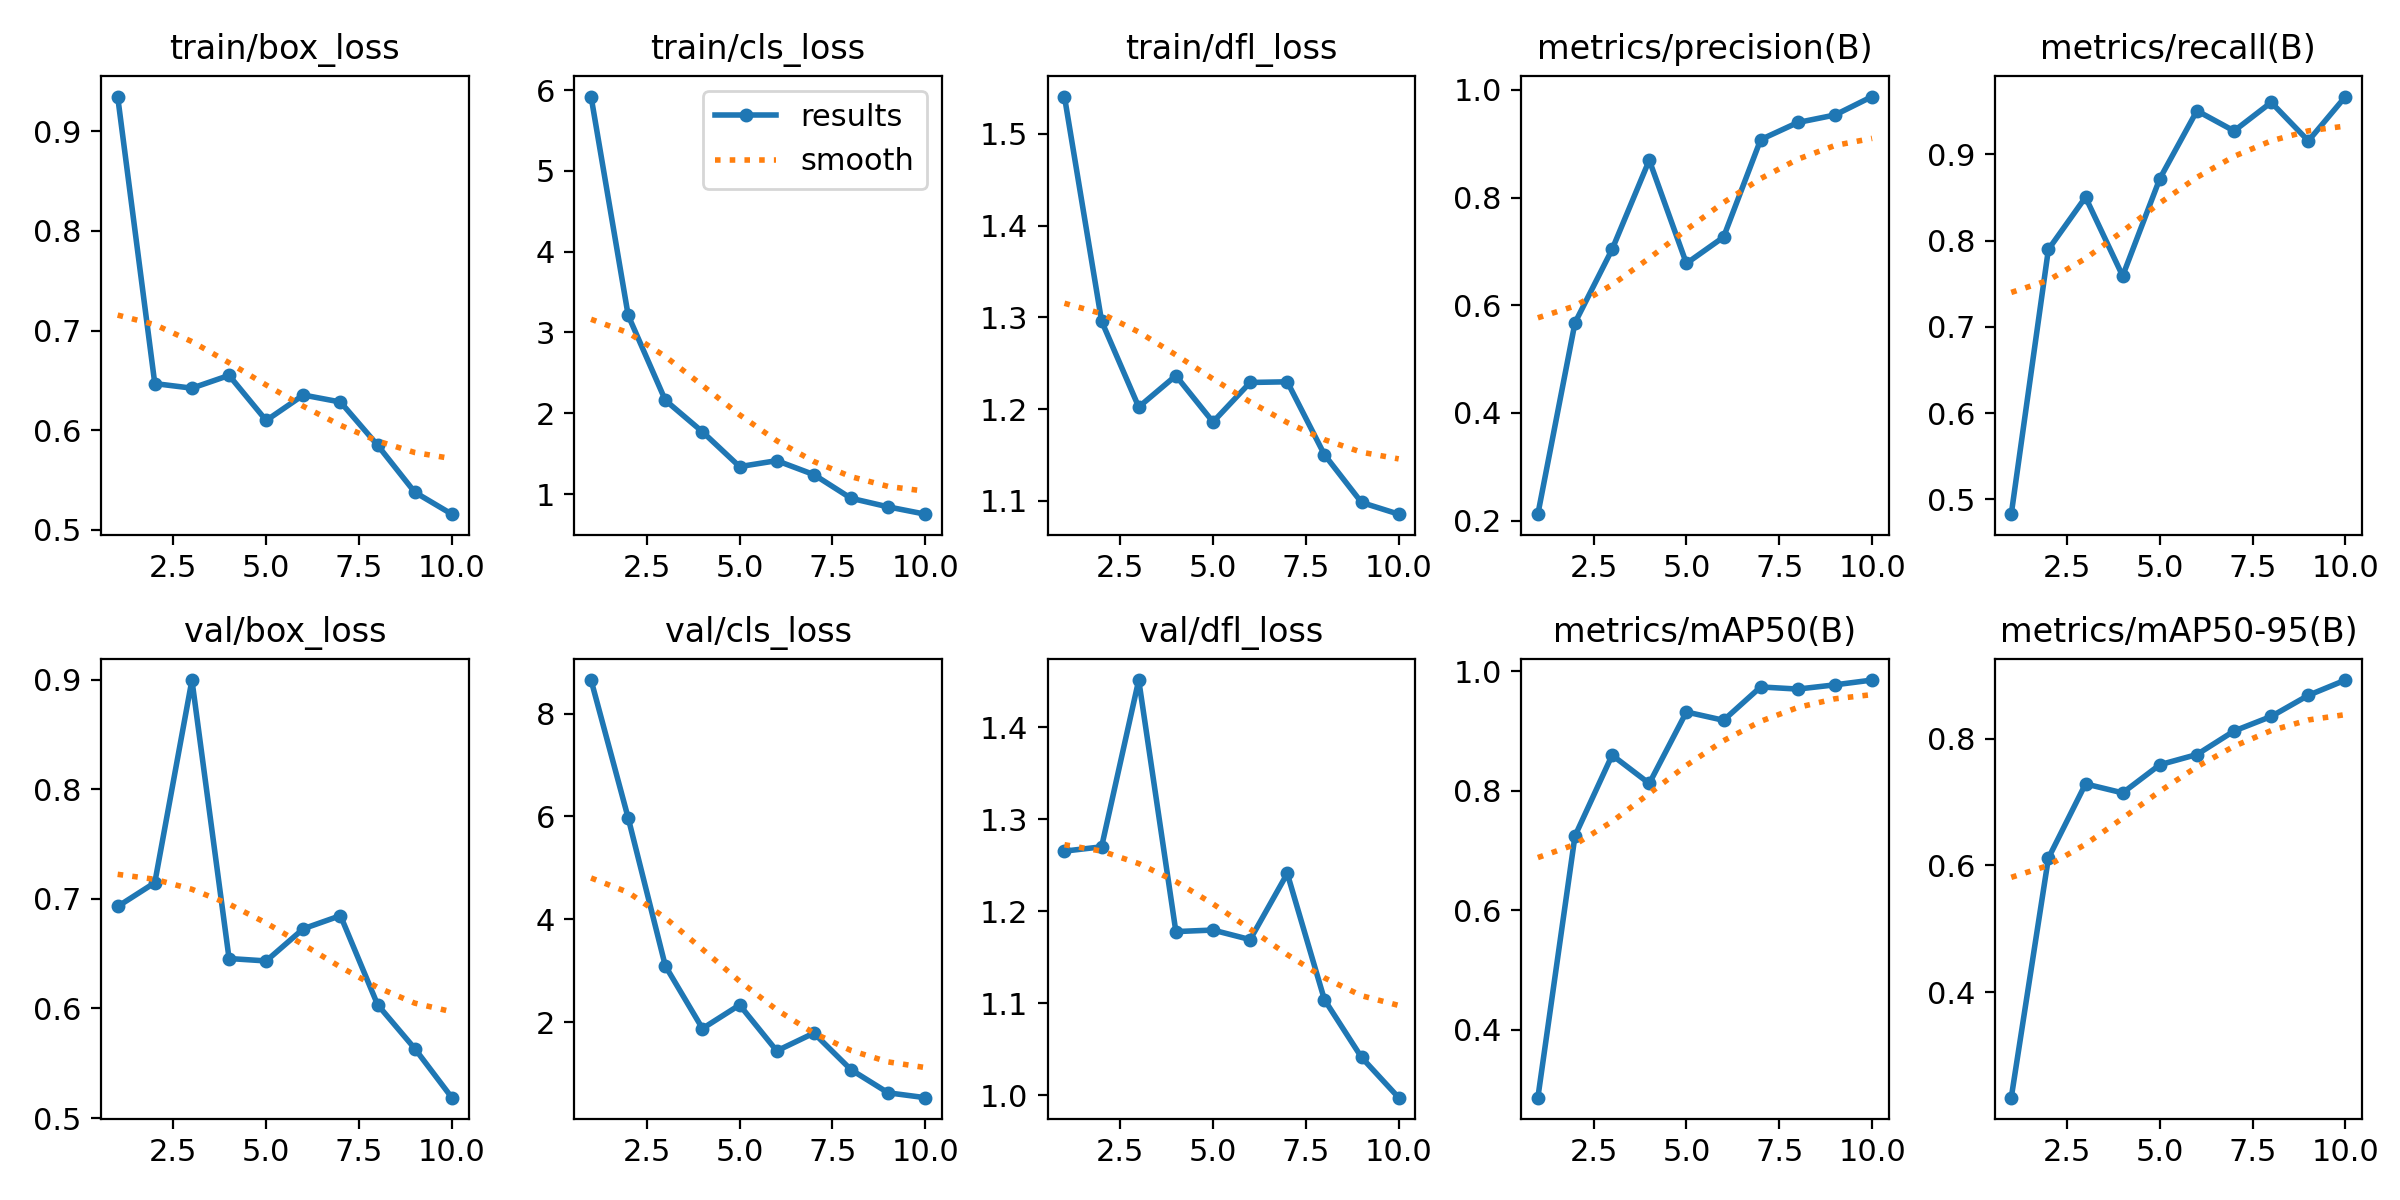

In [5]:
Image(filename='runs/detect/train/results.png', width=600)

In [6]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/dataset-1/data.yaml

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 916.6±233.0 MB/s, size: 14.8 KB)
val: Scanning /content/dataset-1/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 49. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.81it/s]
                   all         49         49      0.988      0.967      0.986      0.893
             blue_ball          6          6      0.981          1      0.995      0.918
              blue_box          9          9          1      

In [7]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/dataset-1/test/images

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/24 /content/dataset-1/test/images/blue_ball_0019_jpg.rf.ce2057721586a42edfcb67c4dae7b632.jpg: 640x640 1 blue_ball, 37.1ms
image 2/24 /content/dataset-1/test/images/blue_ball_0030_jpg.rf.1c30e795b62d1a4a37f80ca97dcc8786.jpg: 640x640 1 blue_ball, 37.1ms
image 3/24 /content/dataset-1/test/images/blue_ball_0034_jpg.rf.8d05178bc2c5303c4958226c017501a0.jpg: 640x640 1 blue_ball, 37.0ms
image 4/24 /content/dataset-1/test/images/blue_ball_0036_jpg.rf.787967678378f54b3779d3dab2d2c9d1.jpg: 640x640 1 blue_ball, 37.0ms
image 5/24 /content/dataset-1/test/images/blue_box_0008_jpg.rf.91a02a72c4aeb1a2537ddd98a67914e2.jpg: 640x640 1 blue_box, 31.9ms
image 6/24 /content/dataset-1/test/images/blue_box_0010_jpg.rf.d465caff9601a38aa5d6a1c8868099cb.jpg: 640x640 1 blue_box, 24.9ms
image 7/24 /content/dataset-1/test/images/blue_box_0026_jp

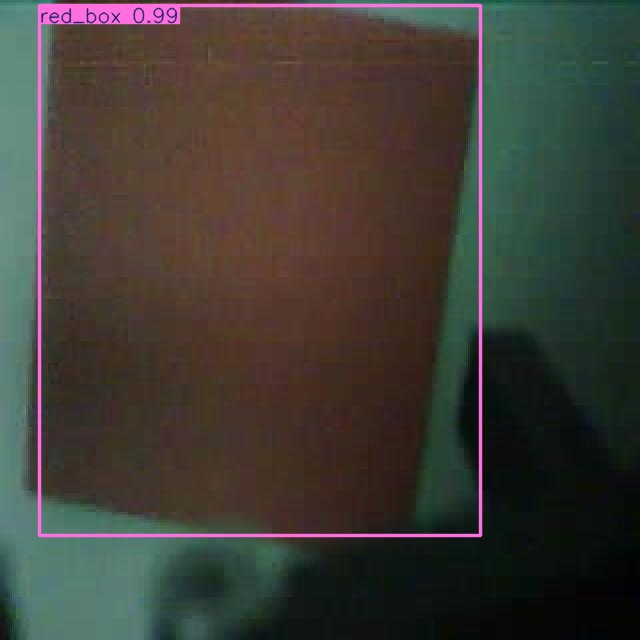

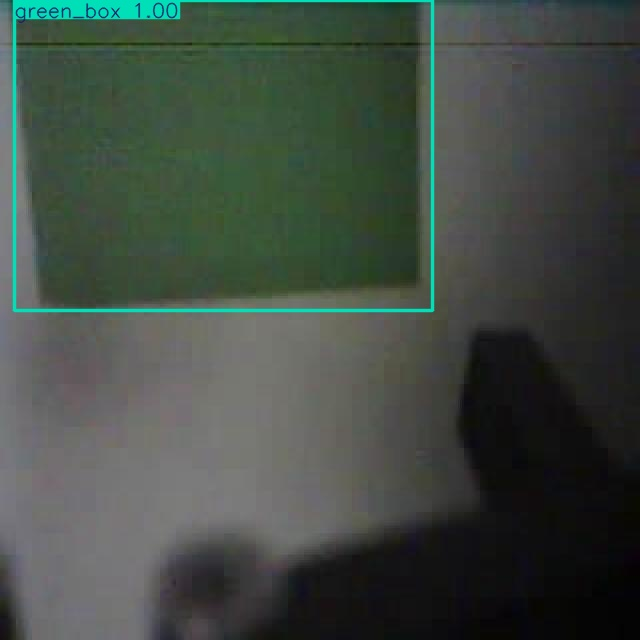

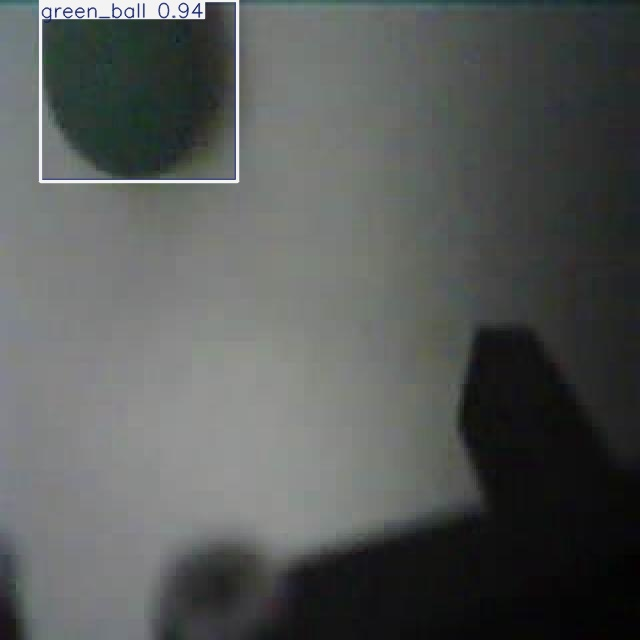

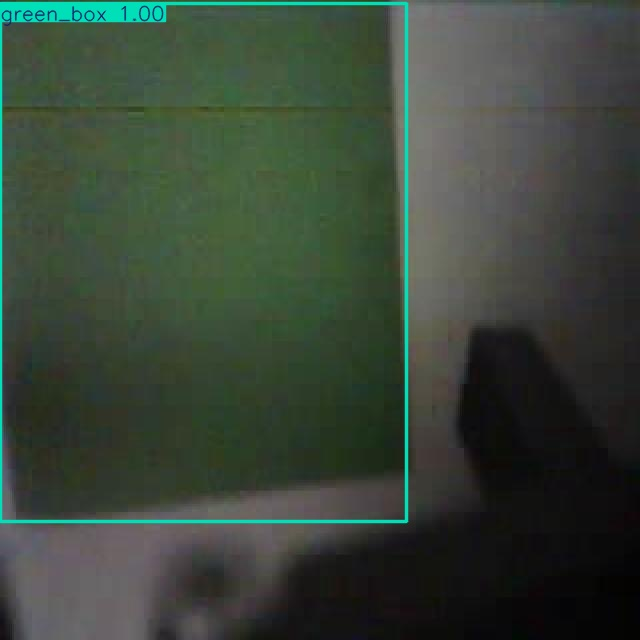

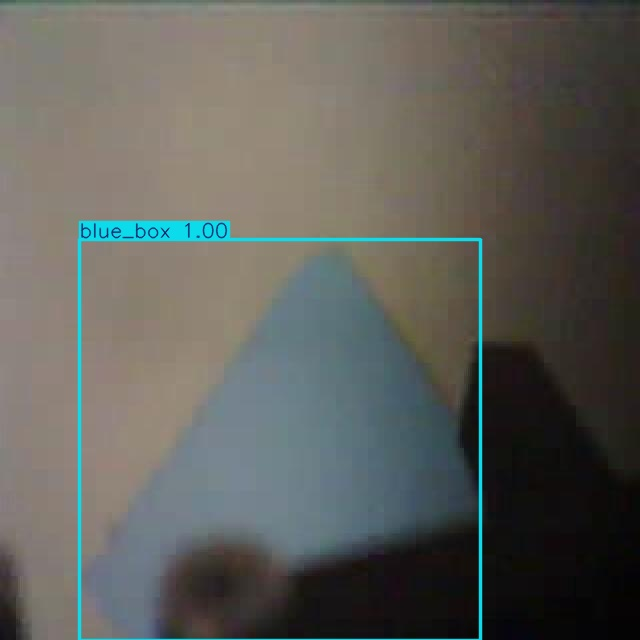

In [8]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[3:8]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [9]:
import os
from google.colab import userdata

# Retrieve the GitHub Personal Access Token from Colab secrets
github_pat = userdata.get('github_token')

if github_pat:
    # GitHub repo info
    username = "nouran25"
    repo_name = "YOLOColorSort"
    branch = "main"
    # Construct the repository URL with the PAT for authentication
    repo_url = f'https://{github_pat}@github.com/{username}/{repo_name}.git'
    # Use the get_ipython().system() to execute the shell command
    os.system(f'git clone --branch {branch} {repo_url}')
else:
    print("❌ GitHub Personal Access Token not found. Please set it in Colab Secrets as 'github_token'")

In [22]:
# Retrieve the GitHub Personal Access Token from Colab secrets
github_pat = userdata.get('github_token')

if github_pat:
    # GitHub repo info
    username = "nouran25"
    repo_name = "YOLOColorSort"
    branch = "main"
    # Construct the repository URL with the PAT for authentication
    repo_url = f'https://{github_pat}@github.com/{username}/{repo_name}.git'
    # Use the get_ipython().system() to execute the shell command
    os.system(f'git clone --branch {branch} {repo_url}')
else:
    print("❌ GitHub Personal Access Token not found. Please set it in Colab Secrets as 'github_token'")

In [26]:
!ls

dataset-1  runs  yolo11n.pt  YOLOColorSort  yolov8m.pt


In [23]:
!git init

Reinitialized existing Git repository in /content/.git/


In [28]:
%cd YOLOColorSort

/content/YOLOColorSort


In [29]:
!ls

cfg  LICENSE  realtime.ipynb  runs


In [31]:
!cp -r /content/runs /content/YOLOColorSort/

In [41]:
# Configure Git (set rebase to false for pulling)
!git config pull.rebase false

# Pull latest changes from remote to avoid conflicts
!git pull origin main

# Stage all changes
!git add .

# Commit with a message
!git commit -m "Add YOLOv8 training output"

# Push to GitHub
!git push origin main  # Change 'main' if you're using a different branch

From https://github.com/nouran25/YOLOColorSort
 * branch            main       -> FETCH_HEAD
Updating 7b64b95..c7428b6
error: Your local changes to the following files would be overwritten by merge:
	runs/detect/train/F1_curve.png
	runs/detect/train/PR_curve.png
	runs/detect/train/P_curve.png
	runs/detect/train/R_curve.png
	runs/detect/train/args.yaml
	runs/detect/train/confusion_matrix.png
	runs/detect/train/confusion_matrix_normalized.png
	runs/detect/train/labels.jpg
	runs/detect/train/labels_correlogram.jpg
	runs/detect/train/results.csv
	runs/detect/train/results.png
	runs/detect/train/train_batch0.jpg
	runs/detect/train/train_batch1.jpg
	runs/detect/train/train_batch2.jpg
	runs/detect/train/val_batch0_labels.jpg
	runs/detect/train/val_batch0_pred.jpg
	runs/detect/train/val_batch1_labels.jpg
	runs/detect/train/val_batch1_pred.jpg
	runs/detect/train/weights/best.pt
	runs/detect/train/weights/last.pt
	runs/detect/val/F1_curve.png
	runs/detect/val/PR_curve.png
	runs/detect/val/P_curv